In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
train = pd.read_csv('D:/DataScience/Git_Hub/NLP_Problems/Toxic_Comment/train.csv')

In [5]:
test = pd.read_csv('D:/DataScience/Git_Hub/NLP_Problems/Toxic_Comment/test.csv')

In [6]:
train.shape,test.shape

((159571, 8), (153164, 2))

In [7]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

### Feature Selection

In [12]:
list_sentence_train = train['comment_text'].fillna('nullValues').values
labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
y = train[labels].values
list_sentence_test = test['comment_text'].fillna('nullValues').values

### Preprocessing

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
vocab_size = 20000 #Number of unique words to use
max_len = 120 #length of sentence 

In [15]:
tokenizer = Tokenizer(num_words=vocab_size)

In [16]:
tokenizer.fit_on_texts(list_sentence_train)

In [17]:
tokenized_train = tokenizer.texts_to_sequences(list_sentence_train)
tokenized_test = tokenizer.texts_to_sequences(list_sentence_test)

In [18]:
X_train = pad_sequences(tokenized_train,maxlen=max_len)
X_test = pad_sequences(tokenized_test,maxlen=max_len)

### Model - LSTM

In [20]:
emd_dim = 16

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,emd_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 100)          26800     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 306       
Total params: 352,156
Trainable params: 352,156
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
batch_size = 264
epochs = 3
history = model.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 127656 samples, validate on 31915 samples
Epoch 1/3
127656/127656 [==============================] - 184s 1ms/sample - loss: 0.1216 - acc: 0.9685 - val_loss: 0.0766 - val_acc: 0.9784
Epoch 2/3
127656/127656 [==============================] - 185s 1ms/sample - loss: 0.0571 - acc: 0.9801 - val_loss: 0.0517 - val_acc: 0.9817
Epoch 3/3
127656/127656 [==============================] - 187s 1ms/sample - loss: 0.0460 - acc: 0.9829 - val_loss: 0.0513 - val_acc: 0.9817


In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

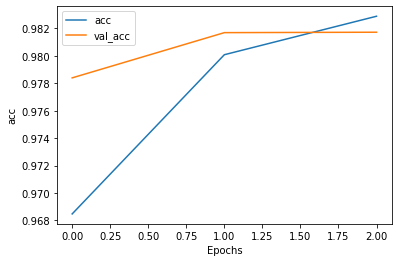

In [26]:
plot_graphs(history,'acc')

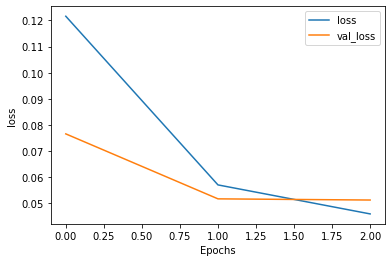

In [27]:
plot_graphs(history,'loss')

In [44]:
sample1 = pd.read_csv('D:/DataScience/Git_Hub/NLP_Problems/Toxic_Comment/sample_submission.csv')

In [45]:
sample1.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [41]:
sample.shape

(153164, 7)

In [42]:
sample[labels] = model.predict([X_test],batch_size=1024,verbose=1)

153164/153164 [==============================] - 50s 329us/sample


In [43]:
sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.991387,0.198871,0.955137,0.037564,0.833645,0.140347
1,0000247867823ef7,0.000656,0.000001,0.000138,0.000011,0.000060,0.000038
2,00013b17ad220c46,0.001019,0.000003,0.000189,0.000021,0.000103,0.000069
3,00017563c3f7919a,0.001752,0.000002,0.000278,0.000019,0.000156,0.000071
4,00017695ad8997eb,0.009598,0.000030,0.001162,0.000157,0.001219,0.000497


In [46]:
sample.to_csv('submission.csv', index=False)